In [17]:
from google.cloud import bigquery
from google.cloud import bigquery_storage
import db_dtypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
client = bigquery.Client()
print(client)

In [8]:
print(bqstorage_client)

In [4]:
client = bigquery.Client()

# Create BigQuery Storage client
bqstorage_client = bigquery_storage.BigQueryReadClient()

query = """
SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE date <= '2023-03-31' and date >= '2023-01-01'
"""

# Fetch results using BigQuery Storage API
df = client.query(query).to_dataframe(bqstorage_client=bqstorage_client)

# Display results
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,RINV-04561500022,2023-03-22,4171,"BROTHERS MARKET, INC. / CASCADE",105 SE NIXON ST,CASCADE,52033,POINT(-90.99372 42.30608),None,DUBUQUE,...,17958,EVAN WILLIAMS BLACK,6,1750,17.00,25.50,-6,-153.00,-10.50,-2.77
1,RINV-04547400030,2023-03-10,5146,FAREWAY STORES #153 / W DES MOINES,329 GRAND AVE,WEST DES MOINES,50265,POINT(-93.70708 41.58271),None,POLK,...,63127,ON THE ROCKS COCKTAILS HORNITOS MARGARITA PET,24,200,3.73,5.60,-24,-134.40,-4.80,-1.26
2,RINV-04554400056,2023-03-16,2661,HY-VEE FOOD STORE / SHELDON,1989 PARK ST,SHELDON,51201,POINT(-95.83133 43.18603),None,O'BRIEN,...,80571,ARROW PEPPERMINT SCHNAPPS MINI,12,50,4.70,7.05,-12,-84.60,-0.60,-0.15
3,INV-55166600009,2023-01-23,4371,KUM & GO #50 / WEST DES MOINES,745 S 51ST ST,WEST DES MOINES,50265,POINT(-93.77348 41.55849),None,POLK,...,101046,FIREBALL CINNAMON WHISKEY PARTY COOLER,6,50,8.60,12.90,1,12.90,0.05,0.01
4,INV-55837700035,2023-02-14,4185,FAREWAY STORES #737 / GRINNELL,727 WEST STREET,GRINNELL,50112.0,POINT(-92.72735 41.74124),None,POWESHIEK,...,11771,BLACK VELVET MINI,8,50,8.87,13.31,1,12.75,0.05,0.01


In [5]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,RINV-04561500022,2023-03-22,4171,"BROTHERS MARKET, INC. / CASCADE",105 SE NIXON ST,CASCADE,52033,POINT(-90.99372 42.30608),None,DUBUQUE,...,17958,EVAN WILLIAMS BLACK,6,1750,17.00,25.50,-6,-153.00,-10.50,-2.77
1,RINV-04547400030,2023-03-10,5146,FAREWAY STORES #153 / W DES MOINES,329 GRAND AVE,WEST DES MOINES,50265,POINT(-93.70708 41.58271),None,POLK,...,63127,ON THE ROCKS COCKTAILS HORNITOS MARGARITA PET,24,200,3.73,5.60,-24,-134.40,-4.80,-1.26
2,RINV-04554400056,2023-03-16,2661,HY-VEE FOOD STORE / SHELDON,1989 PARK ST,SHELDON,51201,POINT(-95.83133 43.18603),None,O'BRIEN,...,80571,ARROW PEPPERMINT SCHNAPPS MINI,12,50,4.70,7.05,-12,-84.60,-0.60,-0.15
3,INV-55166600009,2023-01-23,4371,KUM & GO #50 / WEST DES MOINES,745 S 51ST ST,WEST DES MOINES,50265,POINT(-93.77348 41.55849),None,POLK,...,101046,FIREBALL CINNAMON WHISKEY PARTY COOLER,6,50,8.60,12.90,1,12.90,0.05,0.01
4,INV-55837700035,2023-02-14,4185,FAREWAY STORES #737 / GRINNELL,727 WEST STREET,GRINNELL,50112.0,POINT(-92.72735 41.74124),None,POWESHIEK,...,11771,BLACK VELVET MINI,8,50,8.87,13.31,1,12.75,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624095,INV-56305200184,2023-03-02,2538,HY-VEE FOOD STORE #3 (1866) / WATERLOO,1422 FLAMMANG DR,WATERLOO,50702.0,POINT(-92.32789 42.45998),None,BLACK HAWK,...,101710,FIREBALL WINDOW BOX MINIS,1,50,51.60,77.40,2,154.80,0.10,0.02
624096,INV-56769000005,2023-03-17,5964,CASEY'S GENERAL STORE #3032 / CHARITON,335 N MAIN ST,CHARITON,50049,POINT(-93.30836 41.01794),None,LUCAS,...,84145,99 GRAPES PET MINI,1,50,51.60,77.40,2,154.80,0.10,0.02
624097,INV-55549400013,2023-02-03,5459,CASEY'S GENERAL STORE #1653 / CORNING,204 6TH ST,CORNING,50841.0,POINT(-94.73143 40.98805),None,ADAMS,...,84160,99 APPLES MINI DISPLAY,1,50,51.60,77.40,2,154.80,0.10,0.02
624098,INV-55451400011,2023-01-31,5567,KUM & GO #3504 / IOWA CITY,1310 S GILBERT ST,IOWA CITY,52240,POINT(-91.53203 41.64612),None,JOHNSON,...,84142,99 PEACHES PET MINI,1,50,51.60,77.40,5,387.00,0.25,0.06


In [8]:
df.shape

(624100, 24)

In [21]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624100 entries, 0 to 624099
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  624100 non-null  object 
 1   date                     624100 non-null  dbdate 
 2   store_number             624100 non-null  object 
 3   store_name               624100 non-null  object 
 4   address                  623386 non-null  object 
 5   city                     623386 non-null  object 
 6   zip_code                 623386 non-null  object 
 7   store_location           608433 non-null  object 
 8   county_number            0 non-null       object 
 9   county                   623386 non-null  object 
 10  category                 624100 non-null  object 
 11  category_name            624100 non-null  object 
 12  vendor_number            624100 non-null  object 
 13  vendor_name              624100 non-null  object 
 14  item

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
624095    False
624096    False
624097    False
624098    False
624099    False
Length: 624100, dtype: bool

In [24]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,624100.0,624100.0,624100.000000,624100.000000,624100.0,624100.000000,624100.000000,624100.000000
mean,11.938656,791.831341,12.298621,18.449690,11.655445,161.938988,8.861181,2.335191
std,8.019505,526.1106,13.800399,20.700604,34.531405,555.208561,40.883519,10.800486
min,1.0,20.0,0.890000,1.340000,-294.0,-3498.600000,-220.500000,-58.240000
25%,6.0,375.0,6.000000,9.000000,3.0,44.520000,1.500000,0.390000
50%,12.0,750.0,9.240000,13.860000,6.0,90.000000,4.500000,1.180000
75%,12.0,1000.0,15.000000,22.500000,12.0,166.500000,9.600000,2.530000
max,60.0,4500.0,2298.840000,3448.260000,9900.0,195624.000000,9900.000000,2615.300000


In [10]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Counting the number of NaN for each column
df.isnull().sum().sort_values(ascending=False)

county_number              624100
store_location              15667
address                       714
city                          714
zip_code                      714
county                        714
invoice_and_item_number         0
item_description                0
volume_sold_liters              0
sale_dollars                    0
bottles_sold                    0
state_bottle_retail             0
state_bottle_cost               0
bottle_volume_ml                0
pack                            0
vendor_number                   0
item_number                     0
vendor_name                     0
date                            0
category_name                   0
category                        0
store_name                      0
store_number                    0
volume_sold_gallons             0
dtype: int64

In [12]:
# Counting the percentage of NaN for each column
df.isnull().sum().sort_values(ascending=False) / len(df) #NaN percentage for each column

county_number              1.000000
store_location             0.025103
address                    0.001144
city                       0.001144
zip_code                   0.001144
county                     0.001144
invoice_and_item_number    0.000000
item_description           0.000000
volume_sold_liters         0.000000
sale_dollars               0.000000
bottles_sold               0.000000
state_bottle_retail        0.000000
state_bottle_cost          0.000000
bottle_volume_ml           0.000000
pack                       0.000000
vendor_number              0.000000
item_number                0.000000
vendor_name                0.000000
date                       0.000000
category_name              0.000000
category                   0.000000
store_name                 0.000000
store_number               0.000000
volume_sold_gallons        0.000000
dtype: float64

In [13]:
df.store_name.value_counts()

store_name
HY-VEE #3 / BDI / DES MOINES       5377
CENTRAL CITY 2                     5008
BENZ DISTRIBUTING                  3661
WESTSIDE SPIRITS / CEDAR RAPIDS    3565
HY-VEE #7 / CEDAR RAPIDS           3121
                                   ... 
WILDCAT DISTILLING / DUNCOMBE         2
LONELY OAK DISTILLERY                 2
TEMPLETON DISTILLING LLC              1
CORNERSTONE APOTHECARY                1
HY-VEE GAS / NEWTON                   1
Name: count, Length: 1964, dtype: int64

In [14]:
df.store_location.value_counts()

store_location
POINT(-93.5968 41.55392)       5377
POINT(-93.61378 41.60575)      4983
POINT(-91.65989 41.97575)      3661
POINT(-91.71559 41.96359)      3565
POINT(-91.7014 42.03062)       3121
                               ... 
POINT(-90.58872 41.89218)         2
POINT(-95.47983 41.7709)          2
POINT(-94.936366 41.917072)       1
POINT(-94.01342 41.538)           1
POINT(-93.03507 41.69906)         1
Name: count, Length: 2246, dtype: int64

In [ ]:
sns.histplot(df['sale_dollars'], bins=200,kde = True)
plt.show()

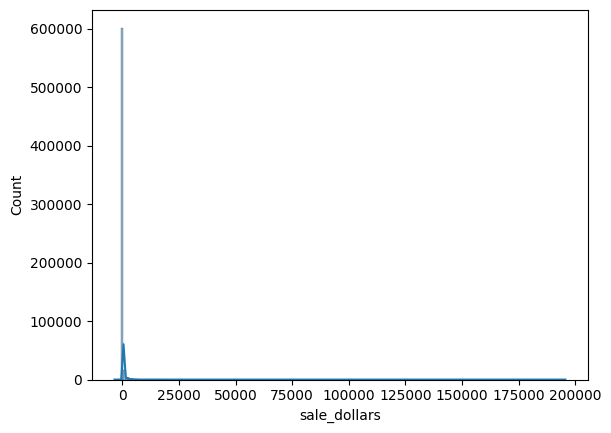

In [ ]:
##Para checar su daistribución ( histograma )
sns.histplot(df['sale_dollars'], bins=200,kde = True)
plt.show()

In [19]:
df.sale_dollars.value_counts()

sale_dollars
77.40      11599
72.00       9684
99.00       9576
180.00      8571
90.00       8529
           ...  
1200.12        1
1499.40        1
1177.20        1
4770.00        1
5202.00        1
Name: count, Length: 7103, dtype: int64